# Interpreting ResNet Model With Smooth Gradients

This notebook loads the pretrained ResNet model given by [PaddlePaddle Models](https://github.com/PaddlePaddle/models/tree/release/1.7) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Smooth Gradients algorithm, specifically the `SmoothGradInterpreter` class.

If you have't done so, please first download the pretrained ResNet50 model from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [1]:
import paddle.fluid as fluid
from PIL import Image
import interpretdl as it
from interpretdl.data_processor.readers import read_image
from interpretdl.data_processor.visualizer import visualize_grayscale
from assets.resnet import ResNet50

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). 
More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [ ]:
# downloads and extracts the model to assets/
!wget http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar -P assets/
!tar -C assets/ -xf assets/ResNet50_pretrained.tar

Define the `paddle_model` function that takes in images and return prediction probabilities. `ResNet50` is borrowed from PaddlePaddle image  classification [models](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification/models).

In [2]:
def paddle_model(data):
    class_num = 1000
    model = ResNet50()
    logits = model.net(input=data, class_dim=class_num)
    probs = fluid.layers.softmax(logits, axis=-1)
    return probs

Initialize the `SmoothGradInterpreter`. 

In [3]:
MODEL_PATH = "assets/ResNet50_pretrained"
sg = it.SmoothGradInterpreter(paddle_model, MODEL_PATH, True)

Before interpreting the image, we first take a look at the original image.

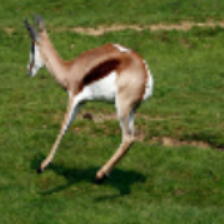

In [4]:
img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Smooth Gradients method help us `interpret` the image with respect to the predicted label. 

We choose noise amount to be 0.1, which means the added Gaussian noise has standard deviation of 0.1 * (x_max - x_min), where x_max and x_min are the maximum and minimum values of the processed image. 

Gradients are overlayed with the original image.

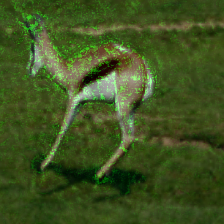

In [5]:
gradients = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

Another choice for visualization is in grayscale:

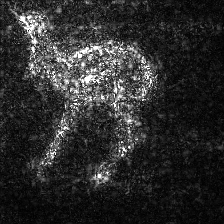

In [6]:
visualize_grayscale(gradients[0])

Let's visualize the effect of noise levels on the smooth gradients method.

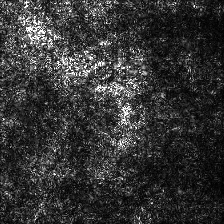

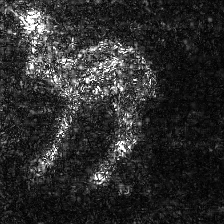

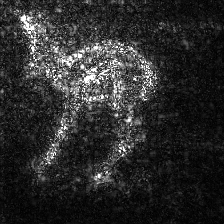

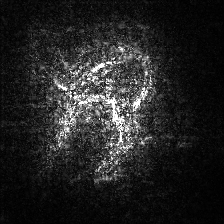

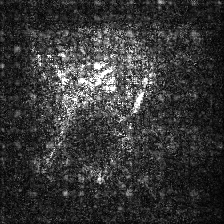

In [5]:
for noise in [0, 0.05, 0.1, 0.3, 0.5]:
    gradients = sg.interpret(
        img_path, 
        noise_amount=noise,
        visual=False, 
        labels=None, 
        save_path=None)
    visualize_grayscale(gradients[0])

Note that `SmoothGradInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!